# Análisis exploratorio de datos

In [2]:
# paquetes
import pandas as pd # para dataframes
import seaborn as sns # para gráficas cool
import matplotlib.pyplot as plt # para ajustes de gráficas sns
import statistics # para estadísticos
import numpy as np # para operaciones numéricas
from sklearn.preprocessing import LabelEncoder

Para ejecutar este código, es necesario primero ejecutar el markdown "Obtencion_Datos.ipynb"

In [3]:
# primero traemos la data resumida de los ecg
datos = pd.read_csv('df_datos.csv', index_col='Unnamed: 0')

# un resumen rápido de la información del df
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_ecg          2400 non-null   float64
 1   categoria       2400 non-null   object 
 2   ritmo_cardiaco  2377 non-null   float64
 3   media_RR        2377 non-null   float64
 4   sd_RR           2377 non-null   float64
 5   min_P           2377 non-null   float64
 6   media_P         2377 non-null   float64
 7   max_P           2377 non-null   float64
 8   sd_P            2377 non-null   float64
 9   min_R           2377 non-null   float64
 10  media_R         2377 non-null   float64
 11  max_R           2377 non-null   float64
 12  sd_R            2377 non-null   float64
 13  min_T           2377 non-null   float64
 14  media_T         2377 non-null   float64
 15  max_T           2377 non-null   float64
 16  sd_T            2377 non-null   float64
 17  patient_id      2383 non-null   float6

El formato de los datos es correcto, todos los valores numéricos son float, solo la categoría es string.

## 1. Ritmo Cardiaco

mínimo: 30.0
percentil 5%: 54.0
promedio: 73.65334455195625
percentil 95%: 108.0
máximo: 168.0


<Axes: xlabel='ritmo_cardiaco', ylabel='Count'>

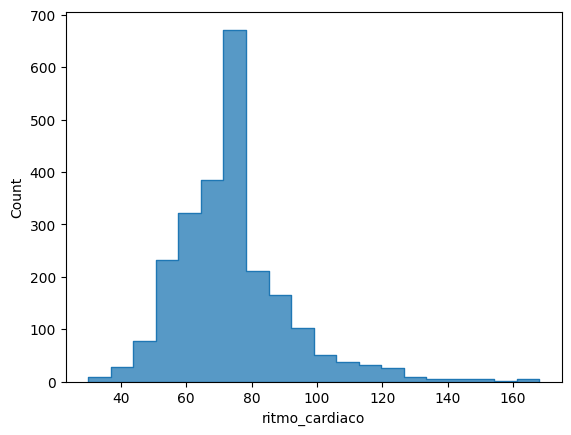

In [4]:
# calculamos los datos centrales
subdatos = datos[~datos['ritmo_cardiaco'].isna()]['ritmo_cardiaco']
minimo = min(subdatos)
cinco_porciento = np.percentile(subdatos,5)
maximo = max(subdatos)
noventaycinco_porciento = np.percentile(subdatos,95)
media = statistics.mean(subdatos)

#imprimimos
print("mínimo: " + str(minimo))
print("percentil 5%: " + str(cinco_porciento))
print("promedio: " + str(media))
print("percentil 95%: " + str(noventaycinco_porciento))
print("máximo: " + str(maximo))

#histograma
sns.histplot(subdatos, bins = 20, element="step")

## 2. Edad y Sexo

EDAD
mínimo: 12.0
percentil 5%: 22.0
promedio: 63.87956357532522
percentil 95%: 86.0
máximo: 300.0


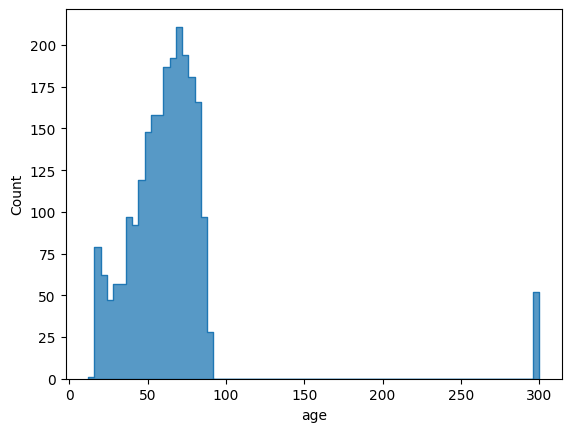


SEXO
mujeres: 1267
porcentaje mujeres: 0.5316827528325639
hombres: 1116
porcentaje hombres: 0.468317247167436


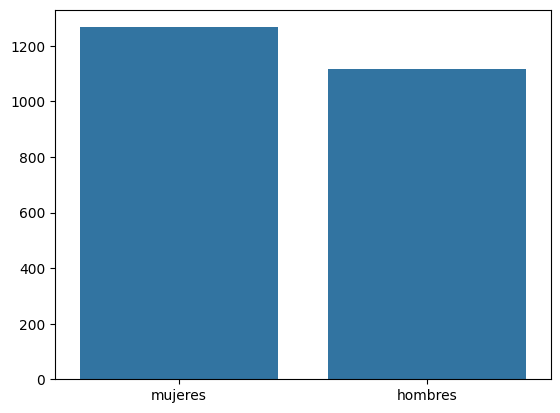

In [7]:
# calculamos los datos centrales
subdatos = datos[~datos[['age','sex']].isna().any(axis=1)][['age','sex']]
minimo = min(subdatos['age'])
cinco_porciento = np.percentile(subdatos['age'],5)
maximo = max(subdatos['age'])
noventaycinco_porciento = np.percentile(subdatos['age'],95)
media = statistics.mean(subdatos['age'])

#imprimimos
print("EDAD")
print("mínimo: " + str(minimo))
print("percentil 5%: " + str(cinco_porciento))
print("promedio: " + str(media))
print("percentil 95%: " + str(noventaycinco_porciento))
print("máximo: " + str(maximo))

#histograma
sns.histplot(subdatos['age'], element="step")
plt.show()

# calculamos los datos centrales
[hombres, mujeres] = subdatos["sex"].value_counts(ascending=True)

#imprimimos
print("")
print("SEXO")
print("mujeres: " + str(mujeres))
print("porcentaje mujeres: " + str(mujeres/(mujeres+hombres)))
print("hombres: " + str(hombres))
print("porcentaje hombres: " + str(hombres/(mujeres+hombres)))

#histograma
sns.barplot(x = ["mujeres", "hombres"], y = [mujeres, hombres])
plt.show()

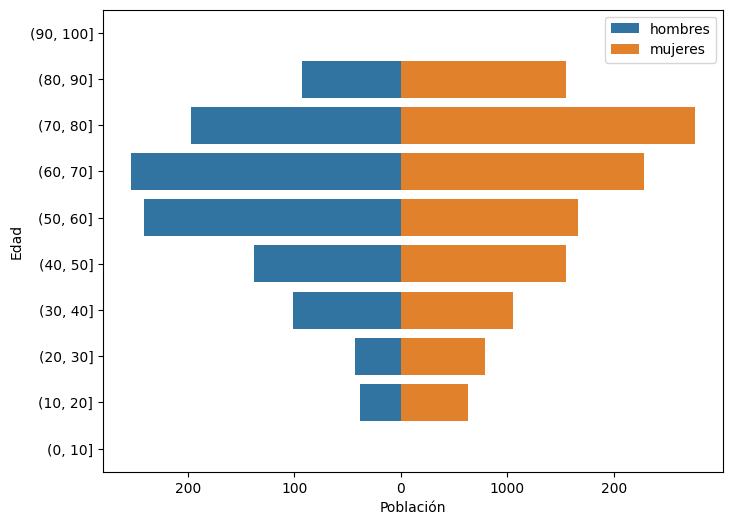

In [74]:
# pirámide de población

# generamos un rango de edades a graficar
secciones_edad = pd.interval_range(start=0, end=100,periods=10)

# etiquetamos cada paciente por su rango de edad
subdatos['secciones_edad'] = pd.cut(subdatos['age'], secciones_edad)

# contabilizamos los casos por edad y sexo
info_piramide = pd.pivot_table(data=subdatos, index='secciones_edad', columns='sex', values = 'sex',aggfunc='count', observed=False)
info_piramide.reset_index(inplace = True)
info_piramide.columns = (["secciones_edad",'hombres','mujeres'])

# ajustamos los datos para gráfica de pirámide
info_piramide['hombres'] = - info_piramide['hombres']

#graficamos
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="hombres", y='secciones_edad', data=info_piramide, label = 'hombres')
sns.barplot(x="mujeres", y='secciones_edad', data=info_piramide, label = 'mujeres')
plt.xticks(ticks=[-200, -100, 0, 100, 200],labels=['200', '100', '0', '1000', '200'])
ax.set_xlabel("Población")
ax.set_ylabel("Edad")
ax.invert_yaxis()
plt.show()

## 3. Matriz de Correlación

<Axes: >

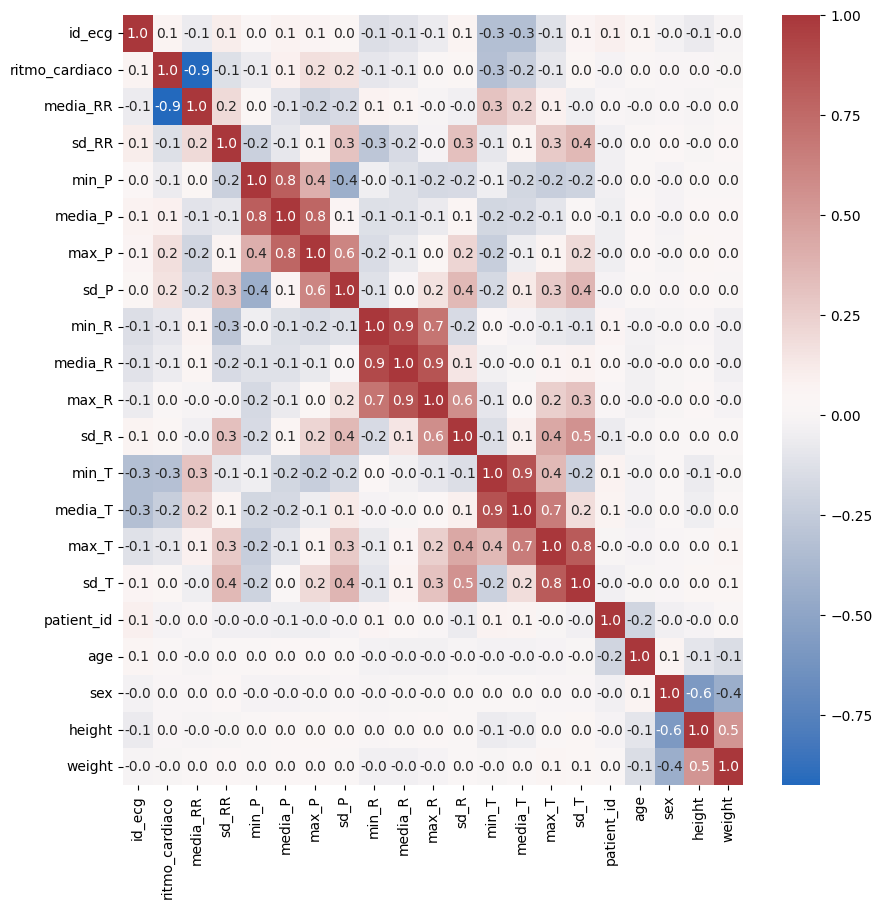

In [87]:
datos_correlacion = datos.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(datos_correlacion,
            annot=True,
            fmt=".1f",
            cmap=sns.color_palette("vlag",as_cmap=True),
            xticklabels=datos_correlacion.columns.values,
            yticklabels=datos_correlacion.columns.values)

In [ ]:
# scatterplot 2 dim de PCA x clase
# codigo de colores por clase

In [ ]:
# boxplot de cada variable clase x clase